In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
from imblearn.over_sampling import SMOTE as SM
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler

### Reading dataset and checking simple metrics

In [2]:
#reading the dataset
df = pd.read_csv("../Datasets/china_data.csv")

In [3]:
#dataset simple overview
df

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,F1472871E1AFF49D4289564B6377D76C,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.25,3.56,3.38,4.39,3.72,3.77,3.96,3.64,3.40,4.38
42368,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,2.70,4.39,3.95,0.00,0.00,0.00,0.00,0.00,...,4.81,4.87,4.48,3.67,3.31,4.58,3.33,3.19,4.57,4.00
42369,A9A0FE83467A680FBFB0DBFC910DF227,0,0.58,0.84,1.61,0.90,0.60,0.82,0.89,0.03,...,NaN,0.66,2.92,2.36,3.86,4.28,3.37,6.67,2.44,1.15
42370,D9A6ADA018FA46A55D5438370456AA45,0,16.89,13.84,13.50,14.60,14.46,12.34,15.37,17.01,...,21.13,13.75,22.61,18.83,25.52,18.11,19.31,17.48,17.20,15.28


In [4]:
#the types in the dataset
df.dtypes

CONS_NO       object
FLAG           int64
2014/1/1     float64
2014/1/10    float64
2014/1/11    float64
              ...   
2016/9/5     float64
2016/9/6     float64
2016/9/7     float64
2016/9/8     float64
2016/9/9     float64
Length: 1036, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42372 entries, 0 to 42371
Columns: 1036 entries, CONS_NO to 2016/9/9
dtypes: float64(1034), int64(1), object(1)
memory usage: 334.9+ MB


In [5]:
#checking the columns
df.columns

Index(['CONS_NO', 'FLAG', '2014/1/1', '2014/1/10', '2014/1/11', '2014/1/12',
       '2014/1/13', '2014/1/14', '2014/1/15', '2014/1/16',
       ...
       '2016/9/28', '2016/9/29', '2016/9/3', '2016/9/30', '2016/9/4',
       '2016/9/5', '2016/9/6', '2016/9/7', '2016/9/8', '2016/9/9'],
      dtype='object', length=1036)

In [7]:
#checking basic metrics
df.describe()

,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
count,42372.000000,25870.000000,25912.000000,25911.000000,25912.00000,25912.000000,25912.000000,25915.000000,25924.000000,25925.000000,...,40544.000000,41482.000000,41915.000000,41151.000000,41906.000000,41873.000000,41850.000000,41967.000000,42044.000000,42027.00000
mean,0.085316,7.168735,6.954202,6.784099,7.08430,10.516470,7.219633,7.341512,7.160004,6.839875,...,8.836129,9.304656,10.758718,9.942215,11.173498,11.482926,11.656425,11.322680,11.015589,10.69165
std,0.279354,34.131237,40.017856,38.327058,31.98716,576.388348,34.703617,36.569049,36.916957,30.235396,...,52.371956,57.063621,88.039832,62.010381,94.267851,100.971180,118.369381,103.891111,100.614909,107.25814
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.660000,0.820000,0.880000,0.880000,0.900000,0.920000,0.940000,0.910000,0.910000,0.90000
50%,0.000000,3.310000,2.870000,2.900000,3.35000,3.440000,3.295000,3.470000,3.130000,3.250000,...,4.380000,4.670000,5.010000,4.820000,5.150000,5.110000,5.190000,5.110000,5.020000,4.93000
75%,0.000000,8.910000,8.170000,8.210000,8.76000,8.620000,8.740000,8.900000,8.780000,8.520000,...,9.300000,9.380000,10.740000,9.700000,11.380000,11.430000,11.600000,11.300000,10.730000,10.28000
max,1.000000,3318.000000,3966.000000,4392.000000,3414.00000,92713.900000,3167.000000,3960.000000,3654.000000,3306.000000,...,6324.000000,6990.000000,14640.000000,6672.000000,16320.000000,17100.000000,21210.000000,17940.000000,16710.000000,18570.00000


### Extracting Flags in dataset and KWhs in dataset

In [8]:
#extracting the cons and flag

cons_flag_df = df.iloc[:,:2]

In [9]:
#storing the KWhs in a different dataframe
KWhs_df = df.iloc[:,2:]

In [10]:
KWhs_df.head()

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


### Dealing with duplicates rows

In [11]:
#dropping duplicate rows
#dropping duplicates
drop_indexed = KWhs_df[KWhs_df.duplicated()].index
# we are dropping the values present with the same data
KWhs_df = KWhs_df.drop(drop_indexed,axis=0)
#dropping duplicate index in cons_flag_df
cons_flag_df = cons_flag_df.drop(drop_indexed,axis=0)

In [12]:
#our data is reduced a bit but we don't want our machine learning model full of duplicates
#we don't want to have too many zero values in our dataset too

### Dealing with Nan and zero values in the dataset

In [13]:


#testing the the rows with entire values as a zero or Nan
KWhs_df.sum(axis = 1) ==0

0        False
1         True
2        False
3        False
4        False
         ...  
42367    False
42368    False
42369    False
42370    False
42371    False
Length: 41494, dtype: bool

In [14]:
KWhs_df.isnull().sum().sum()

10774405

In [16]:

KWhs_df[KWhs_df.sum(axis = 1) ==0]

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# we proceed to remove rows with all values that are Zero or Nan values
zero_index = KWhs_df[KWhs_df.sum(axis=1) ==0].index
KWhs_df = KWhs_df.drop(zero_index,axis=0)
cons_flag_df = cons_flag_df.drop(zero_index,axis=0)

In [18]:
KWhs_df

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.82,5.52,3.12,3.13,4.20,3.23,3.85,2.78,3.55,2.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.25,3.56,3.38,4.39,3.72,3.77,3.96,3.64,3.40,4.38
42368,2.70,4.39,3.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.81,4.87,4.48,3.67,3.31,4.58,3.33,3.19,4.57,4.00
42369,0.58,0.84,1.61,0.90,0.60,0.82,0.89,0.03,0.73,1.68,...,NaN,0.66,2.92,2.36,3.86,4.28,3.37,6.67,2.44,1.15
42370,16.89,13.84,13.50,14.60,14.46,12.34,15.37,17.01,13.46,19.56,...,21.13,13.75,22.61,18.83,25.52,18.11,19.31,17.48,17.20,15.28


In [19]:
cons_flag_df

,CONS_NO,FLAG
0,0387DD8A07E07FDA6271170F86AD9151,1
2,4B75AC4F2D8434CFF62DB64D0BB43103,1
3,B32AC8CC6D5D805AC053557AB05F5343,1
4,EDFC78B07BA2908B3395C4EB2304665E,1
5,6BCFD78138BC72A9BA1BFB0B79382192,1
...,...,...
42367,F1472871E1AFF49D4289564B6377D76C,0
42368,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0
42369,A9A0FE83467A680FBFB0DBFC910DF227,0
42370,D9A6ADA018FA46A55D5438370456AA45,0


### Converting columns to datatime so that we can sort

In [20]:
#Conveting the columns in the dataframe to datatime Objects
# we have to do this to ensure that we don't deal with timestamps
KWhs_df.columns = pd.to_datetime(KWhs_df.columns).date

In [21]:
#sorting the dates(that is the columns according to datatime)

KWhs_df_sorted = KWhs_df.sort_index(axis=1,ascending=True)

In [22]:
KWhs_df_sorted.head()

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.51,2.97,2.93,0.74,0.41,0.42,1.91,0.42,0.38,0.61


### reindexing the dataset

In [23]:
# reindexing rows and colums due to the removal of duplicates, zero and nan values
#index sorting
KWhs_df_sorted.reset_index(inplace=True,drop=True)
cons_flag_df.reset_index(inplace=True,drop=True)


### Adding CONS_NO to the powerdata so that we can merge and save the dataframe as csv

In [24]:
#adding the cons_flag and KWhs_sorted data from so that we can save
#but we are supposed to add the cons column to the KWhs_df_sorted column so the we can merge
KWhs_df_sorted.insert(0,"CONS_NO",cons_flag_df["CONS_NO"])

In [25]:
KWhs_df_sorted

,CONS_NO,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,4B75AC4F2D8434CFF62DB64D0BB43103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
2,B32AC8CC6D5D805AC053557AB05F5343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
3,EDFC78B07BA2908B3395C4EB2304665E,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
4,6BCFD78138BC72A9BA1BFB0B79382192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.51,2.97,2.93,0.74,0.41,0.42,1.91,0.42,0.38,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,F1472871E1AFF49D4289564B6377D76C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
40252,F3C8BBCD2DC26C1E0249DEEF6A4256B7,2.70,0.00,0.00,5.72,6.05,5.81,3.07,4.04,5.68,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
40253,A9A0FE83467A680FBFB0DBFC910DF227,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.70,1.23,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
40254,D9A6ADA018FA46A55D5438370456AA45,16.89,15.15,19.28,17.19,16.80,17.48,17.86,23.99,12.34,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [26]:
#Using the column that is present in both dataframes as key to merge the dataframes
#Using this column as the key on which this dataframe is joined to the cons_flag frame

sorted_df = pd.merge(left=cons_flag_df,right=KWhs_df_sorted,how="left",on="CONS_NO")

In [27]:
sorted_df

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
2,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
3,EDFC78B07BA2908B3395C4EB2304665E,1,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
4,6BCFD78138BC72A9BA1BFB0B79382192,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.51,2.97,2.93,0.74,0.41,0.42,1.91,0.42,0.38,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,F1472871E1AFF49D4289564B6377D76C,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
40252,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,2.70,0.00,0.00,5.72,6.05,5.81,3.07,4.04,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
40253,A9A0FE83467A680FBFB0DBFC910DF227,0,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.70,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
40254,D9A6ADA018FA46A55D5438370456AA45,0,16.89,15.15,19.28,17.19,16.80,17.48,17.86,23.99,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [28]:
sorted_df.to_csv("./Data_clean/sorted_data.csv",index=False)


### dealing with the missing values

In [29]:
dsc_df = sorted_df.describe()

In [30]:
dsc_df

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
count,40256.000000,24832.000000,24835.000000,24834.000000,24836.000000,24836.000000,24840.000000,24841.000000,24867.000000,24867.000000,...,39793.000000,39774.000000,39770.000000,39618.000000,39573.000000,39361.000000,39400.000000,39582.000000,39584.000000,39521.000000
mean,0.088906,7.468395,7.352200,6.985223,7.540129,7.703599,7.229530,7.575275,7.149721,7.247520,...,10.048913,10.191823,8.942016,9.499148,9.883487,10.389237,10.449499,9.304323,8.787839,8.650481
std,0.284612,34.805184,30.673445,31.838874,50.509645,42.293710,38.333199,65.423041,35.534760,40.479393,...,79.471161,77.480877,83.323007,81.376198,82.936188,94.641646,90.615582,86.334928,80.691072,72.649105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.020000,0.000000,0.020000,0.070000,0.020000,0.000000,0.010000,0.000000,...,1.360000,1.390000,1.290000,1.320000,1.370000,1.390000,1.420000,1.330000,1.300000,1.290000
50%,0.000000,3.710000,3.750000,3.450000,3.700000,3.900000,3.700000,3.480000,3.540000,3.480000,...,5.030000,5.170000,4.630000,4.770000,4.910000,5.020000,5.080000,4.800000,4.740000,4.610000
75%,0.000000,9.192500,8.830000,8.340000,8.600000,9.172500,8.550000,8.350000,8.340000,8.480000,...,9.660000,10.040000,8.700000,8.960000,9.330000,9.680000,9.850000,9.040000,8.760000,8.370000
max,1.000000,3318.000000,2500.000000,2674.000000,5670.000000,4854.000000,4170.000000,7119.810000,3546.000000,4416.000000,...,11370.000000,11100.000000,13560.000000,11940.000000,12480.000000,15180.000000,14970.000000,14100.000000,12480.000000,9990.000000


In [31]:
# finding boolean make of non_null values, then sums them by row - only checking KWhs
non_nn_cnt_cns = sorted_df.iloc[:,2:].notnull().sum(axis= 1)

In [32]:
non_nn_cnt_cns

0         591
1         259
2         472
3        1030
4         298
         ... 
40251     801
40252     962
40253    1027
40254     901
40255     304
Length: 40256, dtype: int64

Text(0.5, 1.0, "Distribution of Non-Null KWhs Before 'NAN'replacement")

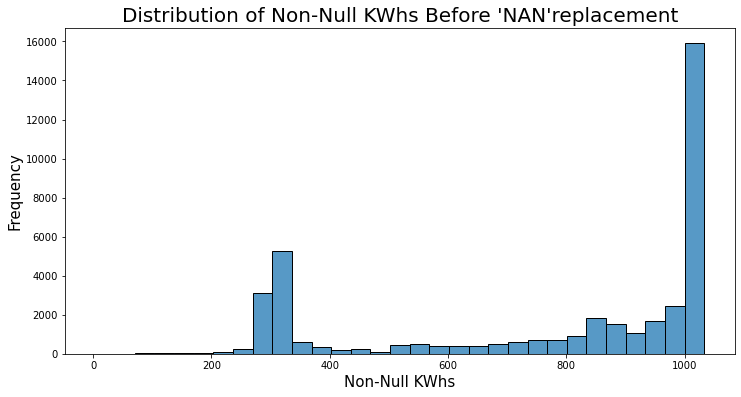

In [33]:
#using a histogram to visualize non-null counts in data
plt.figure(figsize=(12,6))
sns.histplot(non_nn_cnt_cns)
plt.xlabel("Non-Null KWhs", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Distribution of Non-Null KWhs Before 'NAN'replacement", fontsize = 20)

In [34]:

KWhs_df_sorted = KWhs_df_sorted.drop("CONS_NO",axis=1)

In [35]:
KWhs_df_sorted


,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
3,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.51,2.97,2.93,0.74,0.41,0.42,1.91,0.42,0.38,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
40252,2.70,0.00,0.00,5.72,6.05,5.81,3.07,4.04,5.68,4.39,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
40253,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.70,1.23,0.84,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
40254,16.89,15.15,19.28,17.19,16.80,17.48,17.86,23.99,12.34,13.84,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [36]:
cons_flag_df

,CONS_NO,FLAG
0,0387DD8A07E07FDA6271170F86AD9151,1
1,4B75AC4F2D8434CFF62DB64D0BB43103,1
2,B32AC8CC6D5D805AC053557AB05F5343,1
3,EDFC78B07BA2908B3395C4EB2304665E,1
4,6BCFD78138BC72A9BA1BFB0B79382192,1
...,...,...
40251,F1472871E1AFF49D4289564B6377D76C,0
40252,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0
40253,A9A0FE83467A680FBFB0DBFC910DF227,0
40254,D9A6ADA018FA46A55D5438370456AA45,0


### Using different interpolation Styles

#### Style 1

In [37]:
#interpolating.... using to fill Nan values
#filling nan values using neighbouring value(replacing the middle values which are nan with avg and other by maximum of 2 elements)
kWhs_both_inter = KWhs_df_sorted.interpolate(method="linear",limit=2,limit_direction="both",axis = 1).fillna(0)

#### Style 2

In [38]:
#Testing the interpolation in only foward only direction to fill missing values
kWhs_fwrd_inter = KWhs_df_sorted.interpolate(method="linear",limit=2,limit_direction="forward",axis=1).fillna(0)

#### Style 3

In [39]:
#checking the shape
KWhs_df_sorted.shape

(40256, 1034)

In [40]:
#Turning them to numpy array-based solution(Attempting)
kWhs_cal_inter_df =  KWhs_df_sorted.values

In [41]:
#Does it have the right shape
rws,cols = kWhs_cal_inter_df.shape

In [42]:
# Record time at beginning of loop
t_0 = time.time()

# For every consumer
for i in range(0, rws):
  # Print a dot as an update after every 400 consumers
  if (i % 500  == 0):
    print("-", end="")

  # And for every value of that consumer
  for j in range(1, cols - 1):
    # If the current value is undefined
    if (np.isnan(kWhs_cal_inter_df[i, j])):
      if (~np.isnan(kWhs_cal_inter_df[i, j - 1]) and ~np.isnan(kWhs_cal_inter_df[i, j + 1])):
        kWhs_cal_inter_df[i, j] = np.mean([kWhs_cal_inter_df[i, j - 1], kWhs_cal_inter_df[i, j + 1]])
      elif(np.isnan(kWhs_cal_inter_df[i, j - 1]) or np.isnan(kWhs_cal_inter_df[i, j + 1])):
        kWhs_cal_inter_df[i, j] = 0.0

# Record time at end of loop
t_f = time.time()
print((t_f - t_0)/60)





---------------------------------------------------------------------------------3.9165579001108806


In [43]:
kWhs_cal_inter_df

array([[  nan,  0.  ,  0.  , ...,  7.54,  9.16,  6.74],
       [  nan,  0.  ,  0.  , ..., 16.25, 14.2 , 13.66],
       [  nan,  0.  ,  0.  , ..., 19.26, 14.46, 11.72],
       ...,
       [ 0.58,  1.16,  0.92, ...,  0.66,  0.39,  0.65],
       [16.89, 15.15, 19.28, ..., 13.16, 13.33, 10.39],
       [  nan,  0.  ,  0.  , ..., 11.5 ,  7.16,  5.25]])

In [44]:
#making a deep copy so that i don't change the dataframe
replacing_nan_df = KWhs_df_sorted.copy(deep=True)

In [45]:
#converting the np numpy array to dataframes
replacing_nan_df.iloc[:,:] = kWhs_cal_inter_df


In [46]:
# filling the nan values in the first and the last colunns replacing with 0
replacing_nan_df.fillna(0,inplace=True)

In [47]:
replacing_nan_df

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
3,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.51,2.97,2.93,0.74,0.41,0.42,1.91,0.42,0.38,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
40252,2.70,0.00,0.00,5.72,6.05,5.81,3.07,4.04,5.68,4.39,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
40253,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.70,1.23,0.84,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
40254,16.89,15.15,19.28,17.19,16.80,17.48,17.86,23.99,12.34,13.84,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [48]:
#fixing outliers in our data
#computing  means and standard deviations for all consumers

means_cus = kWhs_both_inter.mean(axis=1)
std_cus = kWhs_both_inter.std(axis=1)


In [49]:
#fixing outliers in our data
#computing  means and standard deviations for all consumers

means_cus1 = kWhs_fwrd_inter.mean(axis=1)
std_cus1 = kWhs_fwrd_inter.std(axis=1)

In [50]:

#fixing outliers in our data
#computing  means and standard deviations for all consumers

means_cus2 = replacing_nan_df.mean(axis=1)
std_cus2 = replacing_nan_df.std(axis=1)

In [51]:
means_cus

0         8.026175
1         2.554130
2         6.777253
3         8.259923
4         1.248897
           ...    
40251     3.246688
40252     4.747955
40253     1.336243
40254    15.177099
40255     2.691248
Length: 40256, dtype: float64

In [52]:
means_cus1

0         7.992346
1         2.501554
2         6.688721
3         8.249250
4         1.239497
           ...    
40251     3.240111
40252     4.698389
40253     1.335554
40254    15.147249
40255     2.669507
Length: 40256, dtype: float64

In [53]:
means_cus2

0         7.988158
1         2.501688
2         6.701586
3         8.229603
4         1.229874
           ...    
40251     3.227220
40252     4.607118
40253     1.333032
40254    15.126170
40255     2.674942
Length: 40256, dtype: float64

In [54]:
kWhs_both_inter

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
3,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.51,2.97,2.93,0.74,0.41,0.42,1.91,0.42,0.38,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
40252,2.70,0.00,0.00,5.72,6.05,5.81,3.07,4.04,5.68,4.39,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
40253,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.70,1.23,0.84,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
40254,16.89,15.15,19.28,17.19,16.80,17.48,17.86,23.99,12.34,13.84,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [55]:
kWhs_fwrd_inter

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
3,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.51,2.97,2.93,0.74,0.41,0.42,1.91,0.42,0.38,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
40252,2.70,0.00,0.00,5.72,6.05,5.81,3.07,4.04,5.68,4.39,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
40253,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.70,1.23,0.84,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
40254,16.89,15.15,19.28,17.19,16.80,17.48,17.86,23.99,12.34,13.84,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [56]:
thres = means_cus + 2*std_cus

In [57]:
thres1 = means_cus1 + 2*std_cus1

In [58]:
thres2 = means_cus2 + 2*std_cus2

In [59]:
#replacing the outliers for each consumer
for i in range(0, kWhs_both_inter.shape[0]):
    #updating while process by printing a dot
    
    if (i % 500 == 0):
        print(".",end="")
        
        #compare each value of KWhs of each row(.iloc [i]) with its corresponding threshold
        #If exceeds threshold, replace with threshold. Otherwise, leave changed
        #lambda expression + apply fo faster code
        kWhs_both_inter.iloc[i] = kWhs_both_inter.iloc[i].apply(lambda kWh:thres[i] if kWh > thres[i] else kWh)
    

.................................................................................

In [60]:
#replacing the outliers for each consumer
for i in range(0, kWhs_fwrd_inter.shape[0]):
    #updating while process by printing a dot
    
    if (i % 500 == 0):
        print(".",end="")
        
        #compare each value of KWhs of each row(.iloc [i]) with its corresponding threshold
        #If exceeds threshold, replace with threshold. Otherwise, leave changed
        #lambda expression + apply fo faster code
        kWhs_fwrd_inter.iloc[i] = kWhs_fwrd_inter.iloc[i].apply(lambda kWh:thres1[i] if kWh > thres1[i] else kWh)

.................................................................................

In [61]:
#replacing the outliers for each consumer
for i in range(0, replacing_nan_df.shape[0]):
    #updating while process by printing a dot
    
    if (i % 500 == 0):
        print(".",end="")
        
        #compare each value of KWhs of each row(.iloc [i]) with its corresponding threshold
        #If exceeds threshold, replace with threshold. Otherwise, leave changed
        #lambda expression + apply fo faster code
        replacing_nan_df.iloc[i] = replacing_nan_df.iloc[i].apply(lambda kWh:thres2[i] if kWh > thres2[i] else kWh)

.................................................................................

In [62]:
kWhs_both_inter.shape

(40256, 1034)

In [63]:
kWhs_fwrd_inter.shape

(40256, 1034)

In [64]:
replacing_nan_df.shape

(40256, 1034)

In [65]:
#saving the dataset
kWhs_both_inter.insert(0,"CONS_NO",cons_flag_df["CONS_NO"])
#Using the column that is present in both dataframes as key to merge the dataframes
#Using this column as the key on which this dataframe is joined to the cons_flag frame

kWhs_both_wo_outlrs_df = pd.merge(left=cons_flag_df,right=kWhs_both_inter,how="left",on="CONS_NO")

In [66]:
#saving the dataset
kWhs_fwrd_inter.insert(0,"CONS_NO",cons_flag_df["CONS_NO"])
#Using the column that is present in both dataframes as key to merge the dataframes
#Using this column as the key on which this dataframe is joined to the cons_flag frame

kWhs_fwrd_wo_outlrs_df = pd.merge(left=cons_flag_df,right=kWhs_fwrd_inter,how="left",on="CONS_NO")

In [67]:
#saving the dataset
replacing_nan_df.insert(0,"CONS_NO",cons_flag_df["CONS_NO"])
#Using the column that is present in both dataframes as key to merge the dataframes
#Using this column as the key on which this dataframe is joined to the cons_flag frame

kWhs_calc_wo_outlrs_df = pd.merge(left=cons_flag_df,right=replacing_nan_df,how="left",on="CONS_NO")

In [68]:
kWhs_both_wo_outlrs_df.to_csv("./Data_clean/kWhs_both_wo_outlrs.csv",index=False)

In [69]:
kWhs_fwrd_wo_outlrs_df.to_csv("./Data_clean/kWhs_fwrd_wo_outlrs.csv",index=False)

In [70]:
kWhs_calc_wo_outlrs_df.to_csv("./Data_clean/kWhs_calc_wo_outlrs.csv",index=False)

### Normalizing the dataset
Converting scaled so that it can be saved


In [71]:
def scale_features(X, scaling_strategy='MinMax', plot_distributions=False):
  """Allows user to scale features for individual samples using specified scaling strategy.
  `Standard` - all features scaled to have mean 0, standard deviation of 1
  `MinMax` - all features scaled according to x - x_min / (x_max - x_min)
  `MaxAbs` - all features scaled according to x / abs(x_max)
  
  Returns matrix of scaled features as a numpy array.

  Also allows before/after plots of feature values to compare effect of scaling
  """
  # StandardScaler - all features will have mean of 0, and std deviation of 1
  if (scaling_strategy=='Standard'):
    # Instantiate a StandardScaler object
    scaler = StandardScaler()
  elif (scaling_strategy=='MinMax'):
    scaler = MinMaxScaler()
  elif (scaling_strategy=='MaxAbs'):
    scaler = MaxAbsScaler()

  # Make a copy of the features, transpose so that consumers become columns
  X_copy = X.copy().transpose()

  # Once consumers are in columns, scale each consumer using scaler object and retranspose results 
  # Retransposing ensures that in scaled data, the consumers are still rows
  X_scaled = scaler.fit_transform(X_copy).transpose() # THIS IS A NUMPY ARRAY, NOT A DATAFRAME

  # If the user has asked to compare distributions
  if plot_distributions:
    # First figure - before scaling
    plt.figure(figsize=(12, 6))
    sns.displot(X.values.ravel(), kde=False)
    plt.xlabel('Unscaled kWh Values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('kWh Values - Before Scaling', fontsize=18)

    # Second figure - after scaling
    plt.figure(figsize=(12, 6))
    distplot(X_scaled.ravel(), kde=False, hist_kws=dict(edgecolor='k', linewidth=2))
    plt.xlabel('Scaled kWh Values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('kWh Values - After {} Scaling'.format(scaling_strategy), fontsize=18)

  # Return the scaled features
  return X_scaled

In [72]:
replacing_nan_df

,CONS_NO,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,4B75AC4F2D8434CFF62DB64D0BB43103,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
2,B32AC8CC6D5D805AC053557AB05F5343,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
3,EDFC78B07BA2908B3395C4EB2304665E,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
4,6BCFD78138BC72A9BA1BFB0B79382192,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.51,2.97,2.93,0.74,0.41,0.42,1.91,0.42,0.38,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,F1472871E1AFF49D4289564B6377D76C,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
40252,F3C8BBCD2DC26C1E0249DEEF6A4256B7,2.70,0.00,0.00,5.72,6.05,5.81,3.07,4.04,5.68,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
40253,A9A0FE83467A680FBFB0DBFC910DF227,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.70,1.23,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
40254,D9A6ADA018FA46A55D5438370456AA45,16.89,15.15,19.28,17.19,16.80,17.48,17.86,23.99,12.34,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [73]:
kWhs_both_inter

,CONS_NO,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,4B75AC4F2D8434CFF62DB64D0BB43103,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
2,B32AC8CC6D5D805AC053557AB05F5343,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
3,EDFC78B07BA2908B3395C4EB2304665E,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
4,6BCFD78138BC72A9BA1BFB0B79382192,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.51,2.97,2.93,0.74,0.41,0.42,1.91,0.42,0.38,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,F1472871E1AFF49D4289564B6377D76C,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
40252,F3C8BBCD2DC26C1E0249DEEF6A4256B7,2.70,0.00,0.00,5.72,6.05,5.81,3.07,4.04,5.68,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
40253,A9A0FE83467A680FBFB0DBFC910DF227,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.70,1.23,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
40254,D9A6ADA018FA46A55D5438370456AA45,16.89,15.15,19.28,17.19,16.80,17.48,17.86,23.99,12.34,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [74]:
replacing_nan_df

,CONS_NO,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,4B75AC4F2D8434CFF62DB64D0BB43103,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
2,B32AC8CC6D5D805AC053557AB05F5343,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
3,EDFC78B07BA2908B3395C4EB2304665E,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
4,6BCFD78138BC72A9BA1BFB0B79382192,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.51,2.97,2.93,0.74,0.41,0.42,1.91,0.42,0.38,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,F1472871E1AFF49D4289564B6377D76C,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
40252,F3C8BBCD2DC26C1E0249DEEF6A4256B7,2.70,0.00,0.00,5.72,6.05,5.81,3.07,4.04,5.68,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
40253,A9A0FE83467A680FBFB0DBFC910DF227,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.70,1.23,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
40254,D9A6ADA018FA46A55D5438370456AA45,16.89,15.15,19.28,17.19,16.80,17.48,17.86,23.99,12.34,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [75]:
#we do this in order to get the scaler to produce value b/n 0 and 1
scale_stn = MinMaxScaler(feature_range=(0,1))

In [76]:
x_both_minmax0_1 = scale_stn.fit_transform(kWhs_both_inter.drop("CONS_NO",axis=1))

In [77]:
mim_max0_1 = pd.DataFrame(data=x_both_minmax0_1,columns=KWhs_df_sorted.columns)
mim_max0_1 = pd.concat([cons_flag_df,mim_max0_1],axis=1,sort=False)

In [75]:
#converting to a dataframe
x_both =scale_features(X=kWhs_both_inter.drop("CONS_NO",axis=1))
min_max_both= pd.DataFrame(data=x_both, columns=KWhs_df_sorted.columns)
#returning everything into a dataframe so that we can save in csv
min_max_both= pd.concat([cons_flag_df,min_max_both],axis=1,sort=False)

In [76]:
x_frws= scale_features(X=kWhs_fwrd_inter.drop("CONS_NO",axis=1))
#converting to a dataframe
min_max_fwrd= pd.DataFrame(data=x_frws, columns=KWhs_df_sorted.columns)
#returning everything into a dataframe so that we can save in csv
min_max_fwrd = pd.concat([cons_flag_df,min_max_fwrd],axis=1,sort=False)

In [77]:
x_calc = scale_features(X=replacing_nan_df.drop("CONS_NO",axis=1))
#converting to a dataframe
min_max_calc= pd.DataFrame(data=x_calc, columns=KWhs_df_sorted.columns)
#returning everything into a dataframe so that we can save in csv
min_max_calc = pd.concat([cons_flag_df,min_max_calc],axis=1,sort=False)

In [78]:
mim_max0_1.to_csv("./Data_clean/min_max_0_1.csv",index=False)

In [79]:
min_max_both.to_csv("./Data_clean/min_max_both_inter_scaled.csv",index= False)

In [80]:
min_max_fwrd.to_csv("./Data_clean/min_max_fwrd_inter_scaled.csv",index= False)

In [82]:
min_max_calc.to_csv("./Data_clean/min_max_calc_inter_scaled.csv",index = False)

### spliting the dataset so that i get all the cases with FLAG 1

In [84]:
flag_1_both = min_max_both.loc[min_max_both["FLAG"]==1]

In [85]:
flag_1_both

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264158,0.296902,0.297637,0.350616,0.201613,0.321919,0.342154,0.277402,0.337003,0.247970
1,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,B32AC8CC6D5D805AC053557AB05F5343,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,EDFC78B07BA2908B3395C4EB2304665E,1,0.048145,0.112494,0.144199,0.058008,0.064819,0.105683,0.091123,0.066463,...,0.313762,0.220056,0.178957,0.123532,0.123297,0.138093,0.156646,0.235791,0.211602,0.184829
4,6BCFD78138BC72A9BA1BFB0B79382192,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,3ECE4EDBB9D1872BEF3059C20EC22E1F,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3575,5147B8E84450B2B47551922B768FBBFD,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001139,0.000000,0.000000
3576,1B128CCB5A2708EA3359D9844AFD5B60,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.558733,0.752962,0.836167,0.838743,0.956466,0.839773,0.714580,0.896445,0.893612,1.000000
3577,375F96C23231CC72E2E6AE260F4EC772,1,0.060892,0.179809,0.209911,0.198862,0.168316,0.119473,0.138725,0.190080,...,0.879527,0.793535,0.741202,0.567017,0.555635,0.622352,0.856473,0.745626,0.649919,0.740379


In [86]:
flag_0_both = min_max_both.loc[min_max_both["FLAG"]==0]

In [88]:
flag_0_both

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
3579,1ECF28CAF36C19132B0673378B2B8AA3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.336094,0.062614,0.058170,0.058776,0.062210,0.060796,0.060998,0.068067,0.064835,0.063825
3580,B40585F95C419203FF46350D2360B630,0,0.200967,0.344976,0.322945,0.443310,0.426921,0.213326,0.365664,0.289898,...,0.391725,0.355991,0.309511,0.255239,0.376679,0.381784,0.366470,0.277270,0.438474,0.327512
3581,590251F1A3B8283C482F26331E3AB694,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.274012,0.217475,0.201413,0.118214,0.073241,0.156119,0.225506,0.178285,0.121105,0.222294
3582,B126421AC2054E0F89B2AD699DD95A04,0,0.000000,0.140661,0.000000,0.160031,0.000000,0.000000,0.000000,0.175711,...,0.157110,0.373713,0.243198,0.204612,0.199539,0.235511,0.190469,0.251191,0.423828,0.451191
3583,61E50BE6D7EDAF382C8E4EA3E0B490A8,0,0.000000,0.000000,0.000000,0.388115,0.000000,0.000000,0.000000,0.393888,...,0.163328,0.176910,0.139219,0.153820,0.195925,0.165025,0.219015,0.255688,0.214601,0.186757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,F1472871E1AFF49D4289564B6377D76C,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.288360,0.273369,0.242504,0.265432,0.263668,0.249559,0.223986,0.299824,0.316578,0.223986
40252,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,0.164334,0.000000,0.000000,0.348144,0.368229,0.353621,0.186853,0.245892,...,0.233719,0.402921,0.189897,0.314060,0.220329,0.282410,0.225806,0.378576,0.368229,0.290323
40253,A9A0FE83467A680FBFB0DBFC910DF227,0,0.048013,0.096026,0.076159,0.081126,0.127483,0.114238,0.073675,0.057947,...,0.081954,0.050497,0.053808,0.045530,0.040563,0.042219,0.065397,0.054636,0.032285,0.053808
40254,D9A6ADA018FA46A55D5438370456AA45,0,0.349472,0.313470,0.398924,0.355680,0.347610,0.361680,0.369543,0.496379,...,0.323609,0.340989,0.269812,0.214980,0.248293,0.230706,0.252845,0.272295,0.275812,0.214980


In [90]:
flag_1_fwrd = min_max_fwrd.loc[min_max_fwrd["FLAG"]==1]

In [89]:
flag_0_fwrd = min_max_fwrd.loc[min_max_fwrd["FLAG"]==0]

In [91]:
flag_0_fwrd

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
3579,1ECF28CAF36C19132B0673378B2B8AA3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.336094,0.062614,0.058170,0.058776,0.062210,0.060796,0.060998,0.068067,0.064835,0.063825
3580,B40585F95C419203FF46350D2360B630,0,0.200967,0.344976,0.322945,0.443310,0.426921,0.213326,0.365664,0.289898,...,0.391725,0.355991,0.309511,0.255239,0.376679,0.381784,0.366470,0.277270,0.438474,0.327512
3581,590251F1A3B8283C482F26331E3AB694,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.274012,0.217475,0.201413,0.118214,0.073241,0.156119,0.225506,0.178285,0.121105,0.222294
3582,B126421AC2054E0F89B2AD699DD95A04,0,0.000000,0.140661,0.000000,0.160031,0.000000,0.000000,0.000000,0.175711,...,0.157110,0.373713,0.243198,0.204612,0.199539,0.235511,0.190469,0.251191,0.423828,0.451191
3583,61E50BE6D7EDAF382C8E4EA3E0B490A8,0,0.000000,0.000000,0.000000,0.388115,0.000000,0.000000,0.000000,0.393888,...,0.163328,0.176910,0.139219,0.153820,0.195925,0.165025,0.219015,0.255688,0.214601,0.186757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,F1472871E1AFF49D4289564B6377D76C,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.288360,0.273369,0.242504,0.265432,0.263668,0.249559,0.223986,0.299824,0.316578,0.223986
40252,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,0.164334,0.000000,0.000000,0.348144,0.368229,0.353621,0.186853,0.245892,...,0.233719,0.402921,0.189897,0.314060,0.220329,0.282410,0.225806,0.378576,0.368229,0.290323
40253,A9A0FE83467A680FBFB0DBFC910DF227,0,0.048013,0.096026,0.076159,0.081126,0.127483,0.114238,0.073675,0.057947,...,0.081954,0.050497,0.053808,0.045530,0.040563,0.042219,0.065397,0.054636,0.032285,0.053808
40254,D9A6ADA018FA46A55D5438370456AA45,0,0.349472,0.313470,0.398924,0.355680,0.347610,0.361680,0.369543,0.496379,...,0.323609,0.340989,0.269812,0.214980,0.248293,0.230706,0.252845,0.272295,0.275812,0.214980


In [92]:
flag_1_fwrd

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264238,0.296991,0.297727,0.350722,0.201674,0.322016,0.342258,0.277486,0.337105,0.248045
1,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,B32AC8CC6D5D805AC053557AB05F5343,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,EDFC78B07BA2908B3395C4EB2304665E,1,0.066774,0.129864,0.160949,0.076445,0.083122,0.123187,0.108911,0.084734,...,0.327193,0.235321,0.195026,0.140686,0.140456,0.154962,0.173152,0.250748,0.227032,0.200783
4,6BCFD78138BC72A9BA1BFB0B79382192,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,3ECE4EDBB9D1872BEF3059C20EC22E1F,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3575,5147B8E84450B2B47551922B768FBBFD,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001139,0.000000,0.000000
3576,1B128CCB5A2708EA3359D9844AFD5B60,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.558733,0.752962,0.836167,0.838743,0.956466,0.839773,0.714580,0.896445,0.893612,1.000000
3577,375F96C23231CC72E2E6AE260F4EC772,1,0.060892,0.179809,0.209911,0.198862,0.168316,0.119473,0.138725,0.190080,...,0.879527,0.793535,0.741202,0.567017,0.555635,0.622352,0.856473,0.745626,0.649919,0.740379


In [93]:
flag_1_calc = min_max_calc.loc[min_max_calc["FLAG"]==1]

In [94]:
flag_0_calc = min_max_calc.loc[min_max_calc["FLAG"]==0]

In [100]:
fetch_amt,cols=flag_1_calc.shape

In [101]:
fetch_amt

3579

In [102]:
flag_sample_0= flag_0_calc.sample(fetch_amt)

In [103]:
flag_sample_0

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
11106,D04557B3615A08BDFCC673185F5FE0D9,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10394,421EA730FAB73A58A20171D4C5BF0D22,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.566929,0.555118,0.496063,0.541339,0.606299,0.562992,0.586614,0.533465,0.482283,0.509843
7433,F0F52441407345F8FD5471FD69C9BA23,0,0.333133,0.514896,0.314475,0.288896,0.314776,0.264821,0.384893,0.337647,...,0.441168,0.472164,0.278965,0.406259,0.344267,0.568161,0.340355,0.392416,0.473969,0.410773
27246,22D86CE32E79E368908DAEE58FEE2B23,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.445194,0.486509,0.372681,0.521922,0.472175,0.973862,0.000000,0.232293,0.464587,0.535413
3809,16402084EF39AC9E7512C723FD83AA8E,0,0.143819,0.175643,0.000000,0.467258,0.156365,0.000000,0.000000,0.000000,...,0.235924,0.201040,0.200734,0.202876,0.208078,0.227662,0.187271,0.208996,0.178091,0.272950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,0BC39D386B3E0E135D6A5AEF60FED6C6,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.365513,0.433755,0.269973,0.255326,0.321904,0.366178,0.348202,0.416445,0.299268,0.127830
20954,D3D0E0C88416B6C07CDDFB6AE6D2016D,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.422208,0.523092,0.234851,0.363249,0.530953,0.415329,0.489027,0.339993,0.342286,0.309859
14669,A4ACE150906DAE3D361A2AD4CDE0D229,0,0.046630,0.053292,0.052116,0.170455,0.199060,0.123824,0.212774,0.135188,...,0.243339,0.428683,0.169279,0.182210,0.177900,0.179859,0.308777,0.273511,0.122257,0.108150
14960,7F82B564A88E97E29E3E94B98D04080F,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.034483,0.034483,0.030651,0.030651,0.030651,0.026820,0.011494,0.019157,0.019157,0.030651
